In [1]:
# Libraries for Text Classification
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
# NLP Tools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualizations
from wordcloud import WordCloud

# Ignore warnings for a clean report
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [11]:
df['review_length'] = df['review'].apply(len)
print("\n=== Review Length Summary ===")
print(df['review_length'].describe())


=== Review Length Summary ===
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


In [12]:
print(df.isnull().sum())

review           0
sentiment        0
review_length    0
dtype: int64


In [13]:
from collections import Counter

In [14]:
all_words = ' '.join(df['review']).lower()
all_words = re.findall(r'\b\w+\b', all_words)  # extract words
word_freq = Counter(all_words)
print("\n=== 20 Most Common Words ===")
print(word_freq.most_common(20))


=== 20 Most Common Words ===
[('the', 667993), ('and', 324441), ('a', 322970), ('of', 289410), ('to', 268124), ('is', 211082), ('br', 201951), ('it', 190857), ('in', 186781), ('i', 175633), ('this', 151002), ('that', 143879), ('s', 125008), ('was', 95608), ('as', 91750), ('movie', 87971), ('for', 87471), ('with', 87368), ('but', 83554), ('film', 79705)]


In [15]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


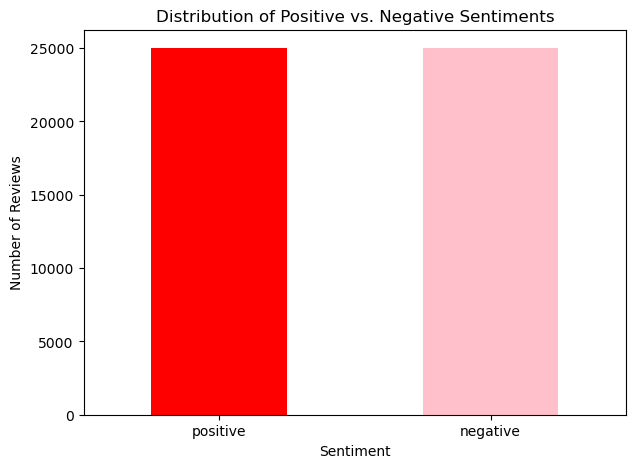

In [16]:
plt.figure(figsize=(7, 5)) # Optional: Adjusts the size of the plot
sentiment_counts.plot(kind='bar', color=['red', 'pink'])

# Add labels and a title
plt.title('Distribution of Positive vs. Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0) # Keeps labels horizontal

# Display the plot
plt.show()